In [ ]:
# Name: Reshmika Gotru  
# Advanced Big Data and Data Mining - Spring 2026
# Lab - 2: Classification Using KNN and RNN Algorithms
# Objective: This lab uses the Wine dataset to examine how well the K-Nearest Neighbors (KNN) and Radius Neighbors (RNN) classifiers perform.

In [ ]:
# Import required libraries
%pip install matplotlib scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------- ------------------- 4.2/8.1 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 30.5 MB/s  0:00:00
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
   ---------------------------------------- 0.0/37.1 MB ? eta -:--:--
   ----------- ---------------------------- 10.5/3

In [ ]:
## Step 1: Load and Prepare the Dataset

# The Wine dataset is loaded from the sklearn package in this phase. 

# Three wine types' chemical characteristics are included in the dataset.

# To facilitate analysis, the data is transformed into a pandas DataFrame. 

# To comprehend the class distribution and dataset structure, basic exploration is carried out.

# 80 % of the dataset is used for training, while 20% of it is used for testing. 

# To make sure that feature magnitude doesn't affect distance estimates, feature scaling is applied using StandardScaler.

In [ ]:
# Load Wine dataset
wine = load_wine()

# Create DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Display first few rows
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Dataset info
print("Dataset Shape:", X.shape)

# Class distribution
print("\nClass Distribution:")
print(y.value_counts())

# Feature summary
X.describe()

Dataset Shape: (178, 13)

Class Distribution:
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)

Training Size: (142, 13)
Testing Size: (36, 13)


In [ ]:
## Step 2: Implement K-Nearest Neighbors (KNN) 

# A classification algorithm called K-Nearest Neighbors classifies a data item according to the majority class of its closest neighbors.

# To examine the impact of neighbor count on performance, several values of k are examined.

# While big k values yield smoother results, small k values are more susceptible to noise.

# The model is assessed using the test data after being trained on the training data for each k value. 

# In order to compare, accuracy is noted.

In [ ]:
# K values
k_values = [1, 5, 11, 15, 21]

knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    knn_accuracies.append(acc)
    
    print(f"K = {k} | Accuracy = {acc:.4f}")

K = 1 | Accuracy = 0.7778
K = 5 | Accuracy = 0.8056
K = 11 | Accuracy = 0.8056
K = 15 | Accuracy = 0.8056
K = 21 | Accuracy = 0.8056


In [ ]:
## Step 3: Implement Radius Neighbours (RNN) 

# Similar to KNN, Radius Neighbors employs a fixed radius rather than a predetermined number of neighbors.

# In order to see how neighborhood size impacts model performance, several radius values are examined. 

# While big radius values may result in over-smoothing, small radius values may result in insufficient neighbors.

# The model is trained and assessed for every radius value. For analysis, accuracy is noted.

In [ ]:
# Radius values
radius_values = [350, 400, 450, 500, 550, 600]

rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=1)
    rnn.fit(X_train, y_train)
    
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    rnn_accuracies.append(acc)
    
    print(f"Radius = {r} | Accuracy = {acc:.4f}")

Radius = 350 | Accuracy = 0.7222
Radius = 400 | Accuracy = 0.6944
Radius = 450 | Accuracy = 0.6944
Radius = 500 | Accuracy = 0.6944
Radius = 550 | Accuracy = 0.6667
Radius = 600 | Accuracy = 0.6667


In [ ]:
## Step 4: Compare and Visualize the Results

# Accuracy trends for KNN and RNN classifiers are displayed using line charts.

# The KNN plot aids in determining the ideal number of neighbors by displaying how accuracy varies with various k values.

# The RNN figure shows how radius values affect classification performance.

# Model efficacy and stability are compared using these visuals

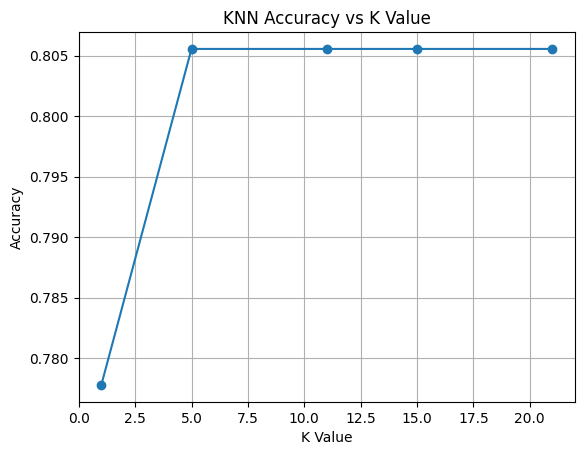

In [ ]:
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

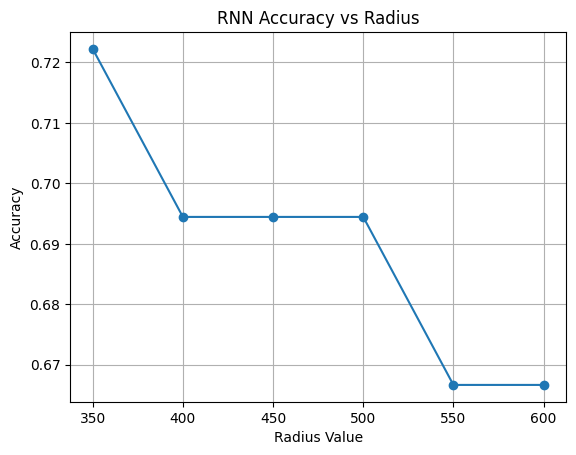

In [ ]:
plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.title("RNN Accuracy vs Radius")
plt.xlabel("Radius Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
## Observations and Conclusion

## KNN Performance
# The k parameter affects the KNN accuracy.
# Overfitting could result from small k values.
# Although they may lessen sensitivity, larger k values increase stability.


## Performance of RNNs
# Selecting the right radius has a significant impact on RNN accuracy.
# Multiple spots may remain unclassified with small radius values.
# Greater coverage is achieved with larger radius settings, however noisy neighbors may be present.


## Comparison
# In general, KNN performed more steadily.
# RNN was more susceptible to changes in parameters.
# When the dataset size is reasonable and evenly distributed, KNN is the best option.
# When there are natural distance boundaries, RNN is helpful.

## Usage
# When the dataset is balanced and evenly distributed, use KNN.
# When there are natural distance bounds in the data, use RNN.

## Conclusion
# According to the findings, KNN handled the Wine dataset more reliably.